In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:\\Namrata\\Data Sets for Data Analysis\\Airline+Loyalty+Program\\Customer Loyalty History.csv")
df

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


## Basic info about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [4]:
#Identifying null values
df.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [5]:
df.dtypes

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

In [6]:
df.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [7]:
df.shape

(16737, 16)

## Treating null values

In [8]:
##Treating null values present in the 'Salary' column
df['Salary'].isnull().sum()

np.int64(4238)

In [9]:
#Fill salaries with 0 for college students as they haven't started earning yet
df.loc[df['Education']=='College', 'Salary'] = 0

In [10]:
df

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,0.0,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,0.0,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,0.0,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,0.0,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,0.0,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [11]:
#Treating missing values in the 'Cancellation year' and 'cancellation month' column (missing = not cancelled)
df['Cancellation Year'] = df['Cancellation Year'].fillna(0).astype(int)
df['Cancellation Month'] = df['Cancellation Month'].fillna(0).astype(int)

In [12]:
df

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,0.0,Divorced,Star,3839.61,Standard,2016,3,0,0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,0.0,Single,Star,3839.75,Standard,2014,7,2018,1
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,0.0,Single,Star,3839.75,Standard,2013,2,0,0
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,0.0,Married,Star,61850.19,Standard,2012,12,0,0
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,0,0
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,0.0,Single,Star,74228.52,Standard,2014,3,0,0
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,0,0


In [13]:
df.isnull().sum()

Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

## Demographic Insights
##Uses:- Gender, Education, Marital Status, Province, City, Salary

In [14]:
#Gender distribution of customers
df['Gender'].value_counts()

Gender
Female    8410
Male      8327
Name: count, dtype: int64

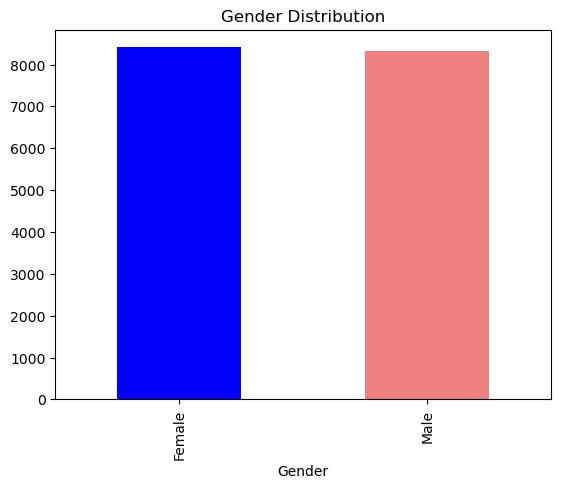

In [15]:
#Bar graph to visualise the gender distribution of the customers
import matplotlib.pyplot as plt
df['Gender'].value_counts().plot(kind='bar', title = 'Gender Distribution', color = ['blue', 'lightcoral'])
plt.show()

In [16]:
#Marital Status of the customers
df['Marital Status'].value_counts()

Marital Status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64

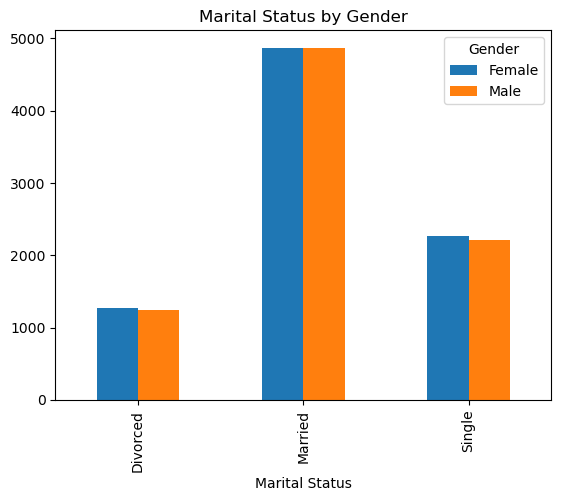

In [17]:
#Marital Status vs Gender
pd.crosstab(df['Marital Status'], df['Gender']).plot(kind='bar', title='Marital Status by Gender')
plt.show()

In [18]:
#Education Distribution
df['Education'].value_counts()

Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

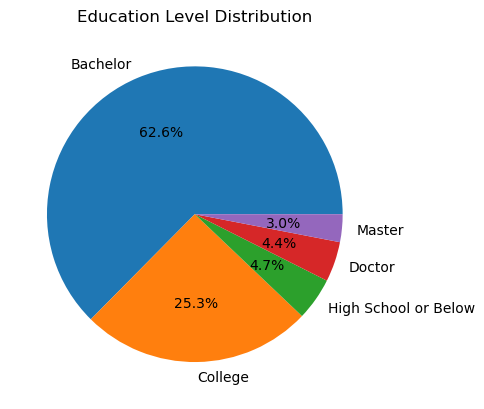

In [19]:
#Visual representation of Education Distribution
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Education Level Distribution')
plt.ylabel('')
plt.show()

In [20]:
edu_salary=df.groupby('Education')['Salary'].mean().sort_values(ascending=False)
edu_salary

Education
Doctor                  178608.897820
Master                  103757.848425
Bachelor                 72451.061575
High School or Below     61071.718670
College                      0.000000
Name: Salary, dtype: float64

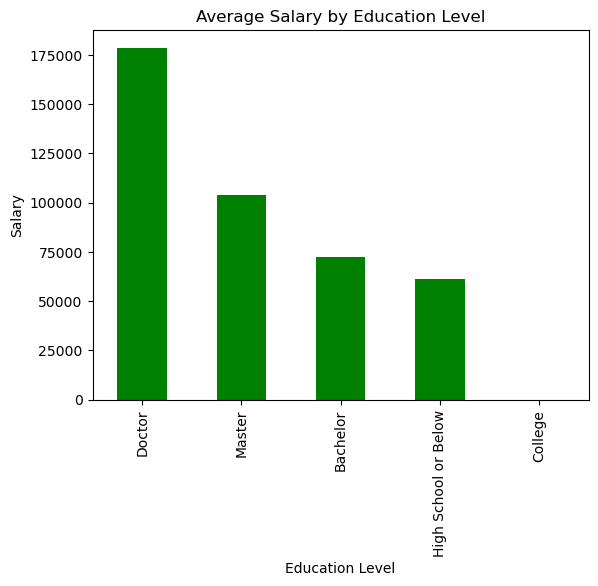

In [21]:
#Average Salary by Eduation
edu_salary.plot(kind='bar', title='Average Salary by Education Level', color='green')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

In [22]:
#Province of the customers
df['Province'].value_counts()

Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64

In [23]:
#Identify the top 10 province by customers
Top_province=df['Province'].value_counts().head(5)
Top_province

Province
Ontario             5404
British Columbia    4409
Quebec              3300
Alberta              969
Manitoba             658
Name: count, dtype: int64

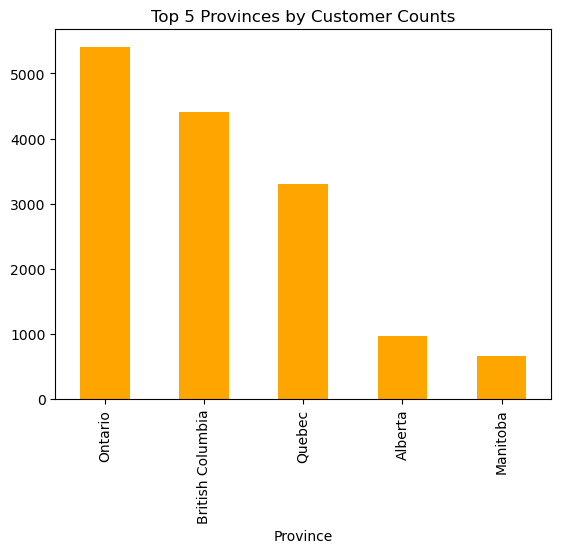

In [24]:
Top_province.plot(kind='bar', title='Top 5 Provinces by Customer Counts', color='orange')
plt.show()

## Loyalty Program Insights
##Use:- Loyalty Card, CLV, Enrollment Type

In [25]:
#Count of customers by loyalty card
df['Loyalty Card'].value_counts()

Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

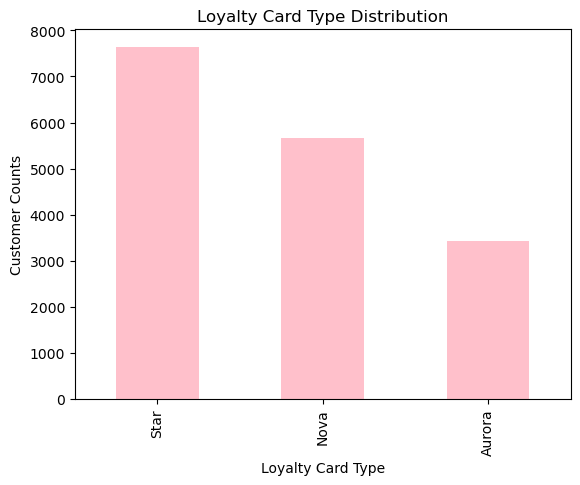

In [26]:
##Visual representation of count of customers by loyalty card
df['Loyalty Card'].value_counts().plot(kind='bar', title='Loyalty Card Type Distribution', color='pink')
plt.xlabel('Loyalty Card Type')
plt.ylabel('Customer Counts')
plt.show()

In [27]:
#Average CLV by customer loyalty
clv_card=df.groupby('Loyalty Card')['CLV'].mean().sort_values(ascending=False)
clv_card

Loyalty Card
Aurora    10672.686325
Nova       8045.615995
Star       6741.761372
Name: CLV, dtype: float64

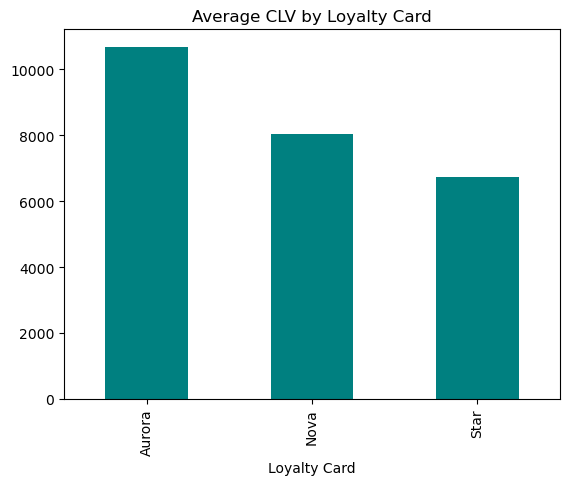

In [28]:
clv_card.plot(kind='bar', title='Average CLV by Loyalty Card', color='teal')
plt.show()

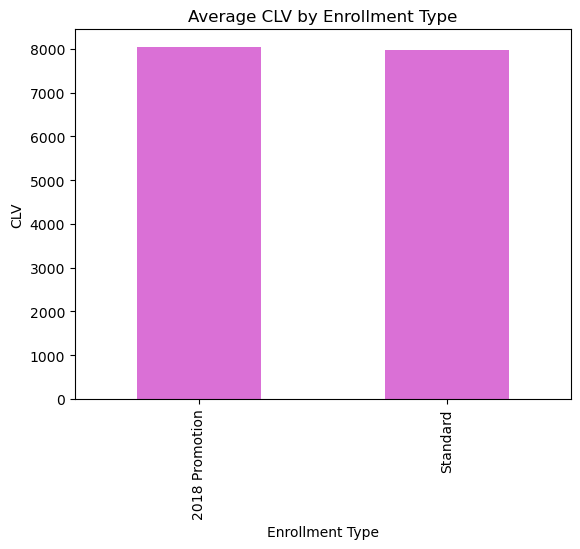

In [29]:
#CLV by enrollment type
df.groupby('Enrollment Type')['CLV'].mean().plot(kind='bar', title='Average CLV by Enrollment Type', color='orchid')
plt.xlabel('Enrollment Type')
plt.ylabel('CLV')
plt.show()

## Enrollment & Cancellation Trends
##Use:- Enrollment Trend, Cancellation Trend, Retention Rate

In [30]:
#Enrollment trend by year
enroll_trend=df['Enrollment Year'].value_counts().sort_index()
enroll_trend

Enrollment Year
2012    1686
2013    2397
2014    2370
2015    2331
2016    2456
2017    2487
2018    3010
Name: count, dtype: int64

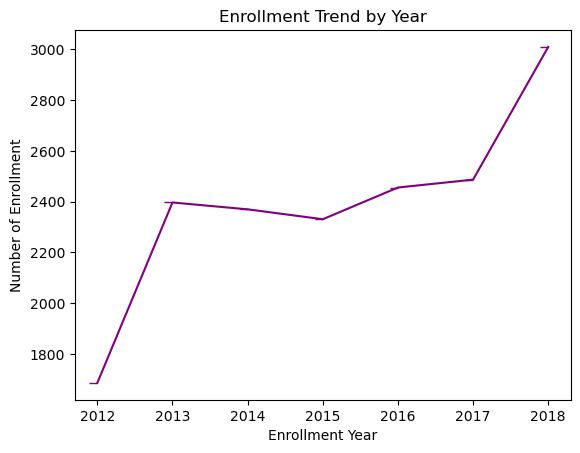

In [31]:
#Visual representation of enrollment trend by year
enroll_trend.plot(kind='line', marker=0, title='Enrollment Trend by Year', color='purple')
plt.xlabel('Enrollment Year')
plt.ylabel('Number of Enrollment')
plt.show()

In [32]:
#Cancellation trend by year
cancelled=df[df['Cancellation Year'] !=0]
cancel_trend=cancelled['Cancellation Year'].value_counts().sort_index()
cancel_trend

Cancellation Year
2013     43
2014    181
2015    265
2016    427
2017    506
2018    645
Name: count, dtype: int64

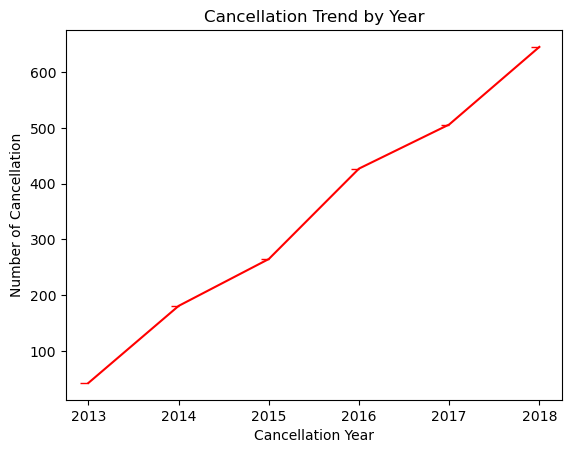

In [33]:
#Visual representation of cancellation trend by year
cancel_trend.plot(kind='line', marker=0, title='Cancellation Trend by Year', color='red')
plt.xlabel('Cancellation Year')
plt.ylabel('Number of Cancellation')
plt.show()

In [34]:
#Retention Rate per year
enrollments=df['Enrollment Year'].value_counts()
cancellations=cancelled['Cancellation Year'].value_counts()
retention=1-(cancellations/enrollments)
retention

2012         NaN
2013    0.982061
2014    0.923629
2015    0.886315
2016    0.826140
2017    0.796542
2018    0.785714
Name: count, dtype: float64

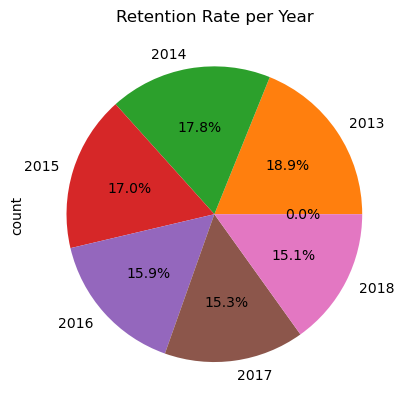

In [35]:
retention.plot(kind='pie', autopct='%1.1f%%', title='Retention Rate per Year')
plt.show()

## Customer Value and Behaviour
##Use:- Correlation b/w salary and CLV, Average Salary and CLV by Customer Loyalty Card, Salary Comparisons

In [36]:
#Correlation b/w salary and CLV
df[['Salary', 'CLV']].corr()

,Salary,CLV
Salary,1.000000,0.012471
CLV,0.012471,1.000000


In [37]:
#Average Salary and CLV by loyalty card
df.groupby('Loyalty Card')[['Salary', 'CLV']].mean()

,Salary,CLV
Loyalty Card,,
Aurora,60590.936716,10672.686325
Nova,60258.176688,8045.615995
Star,57745.244206,6741.761372


In [38]:
#Salary Comparisons: Cancelled vs Active Customers
df['Cancelled']=df['Cancellation Year'].apply(lambda x:1 if x!=0 else 0)
df.groupby('Cancelled')['Salary'].mean()

Cancelled
0    59201.807771
1    59022.908563
Name: Salary, dtype: float64

## Geographical Insights

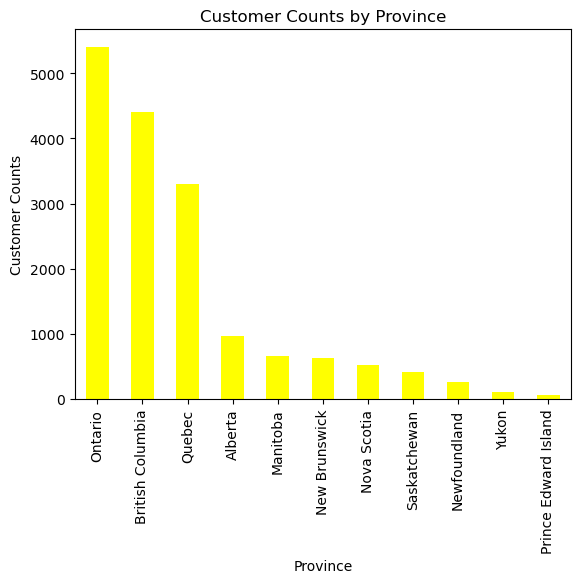

In [39]:
#Customer count by province
df['Province'].value_counts().plot(kind='bar', title='Customer Counts by Province', color='yellow')
plt.xlabel('Province')
plt.ylabel('Customer Counts')
plt.show()

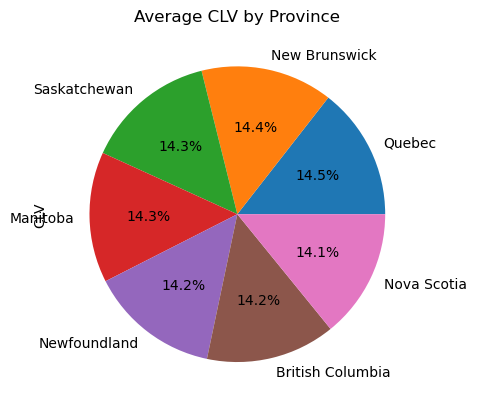

In [40]:
#Average CLV by Province
df.groupby('Province')['CLV'].mean().sort_values(ascending=False).head(7).plot(kind='pie', autopct='%1.1f%%', title='Average CLV by Province')
plt.show()

## Derived Insights

In [41]:
#Customer Duration (Active Years)
df['Duration']=df['Cancellation Year']-df['Enrollment Year']
df['Duration']=df['Duration'].fillna(0)
df['Duration']

0       -2016
1       -2016
2           4
3       -2013
4       -2014
         ... 
16732   -2012
16733   -2014
16734   -2014
16735   -2018
16736       1
Name: Duration, Length: 16737, dtype: int64

In [42]:
df['Duration'].describe()

count    16737.000000
mean     -1766.217422
std        663.477018
min      -2018.000000
25%      -2017.000000
50%      -2015.000000
75%      -2013.000000
max          5.000000
Name: Duration, dtype: float64

In [43]:
#Average duration of cancelled customers
df[df['Duration']>0]['Duration'].mean()

np.float64(1.7661725067385445)

## Insights
##Demographic Insights:-
1. Slight difference between male and female customers.
2. Most of customers are married.
3. 62.6% of the airline customers have bachelor's education level followed by college students with 25.3% and Masters are lowest with 3.0%.
4. Customers with Doctor's education level have highest average salary while college students have no income at all.
5. Highest number of customers are from Ontario province.

##Loyalty Program Insight
1. 7637 customers have star loyalty card.
2. Customers having Aurora loyalty card shows highest CLV.

##Enrollment and Cancellation Insights
1. Year 2018 witnessed the highest number of enrollments.
2. However, year 2018 also witnessed the highest number of cancellations.
3. Year 2013 has the highest retention rate of customers.

##Customer Value and Behaviour
1. There is a positive correlation between salary of the customers and their life time value (CLV)
2. Quebec province has highest CLV with 14.4%,

## Create new dataframe with additional information on same loyalty number

In [44]:
import pandas as pd
df1=pd.read_csv("D:\\Namrata\\Data Sets for Data Analysis\\Airline+Loyalty+Program\\Customer Flight Activity.csv")
df1

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...
392931,999986,2018,4,0,0,0.0,0,0
392932,999986,2018,5,0,0,0.0,0,0
392933,999986,2018,6,0,0,0.0,0,0
392934,999986,2018,9,0,0,0.0,0,0


In [45]:
#Merging the new dataframe df1 with the previous dataframe on the basis of 'Loyalty Number' and create new dataframe df2
df2=pd.merge(df,df1,on='Loyalty Number')
df2

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Cancellation Month,Cancelled,Duration,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,0,0,-2016,2018,7,5,11355,11355.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,0,0,-2016,2017,5,4,4908,4908.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,0,0,-2016,2017,6,4,6948,6948.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,0,0,-2016,2017,8,4,5516,5516.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,0,0,-2016,2018,4,4,4376,4376.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392931,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,...,8,1,1,2018,8,0,0,0.0,0,0
392932,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,...,8,1,1,2018,9,0,0,0.0,0,0
392933,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,...,8,1,1,2018,10,0,0,0.0,0,0
392934,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,...,8,1,1,2018,11,0,0,0.0,0,0


## Basic info about the new dataframe df2

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Country                      392936 non-null  object 
 2   Province                     392936 non-null  object 
 3   City                         392936 non-null  object 
 4   Postal Code                  392936 non-null  object 
 5   Gender                       392936 non-null  object 
 6   Education                    392936 non-null  object 
 7   Salary                       392936 non-null  float64
 8   Marital Status               392936 non-null  object 
 9   Loyalty Card                 392936 non-null  object 
 10  CLV                          392936 non-null  float64
 11  Enrollment Type              392936 non-null  object 
 12  Enrollment Year              392936 non-null  int64  
 13 

In [47]:
df2['Loyalty Number'].value_counts()

Loyalty Number
678205    72
622975    48
206050    48
181082    48
992168    48
          ..
827194    11
675879    11
645919    11
110262    11
358012    11
Name: count, Length: 16737, dtype: int64

In [48]:
df2.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Cancelled', 'Duration',
       'Year', 'Month', 'Total Flights', 'Distance', 'Points Accumulated',
       'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

## Travel Behaviour and Flight Patterns

In [49]:
#Average number of flights per user
df2['Total Flights'].mean()

np.float64(1.294887717083698)

In [50]:
#Country or province with most travelers
df2.groupby('Country')['Total Flights'].mean().sort_values(ascending=False)

Country
Canada    1.294888
Name: Total Flights, dtype: float64

In [84]:
#Country or province with most travelers
df2.groupby('Province')['Total Flights'].mean().sort_values(ascending=False)

Province
Yukon                   1.438740
New Brunswick           1.330401
British Columbia        1.309763
Quebec                  1.300039
Ontario                 1.291942
Alberta                 1.287206
Saskatchewan            1.275769
Nova Scotia             1.258334
Newfoundland            1.250819
Manitoba                1.220482
Prince Edward Island    1.160407
Name: Total Flights, dtype: float64

In [51]:
#Average total flights per loyalty card
df2.groupby('Loyalty Card')['Total Flights'].mean().sort_values(ascending=False)

Loyalty Card
Nova      1.296792
Aurora    1.294341
Star      1.293715
Name: Total Flights, dtype: float64

In [52]:
#Flight cancellation rate
cancel_rate=(df2['Cancelled'].sum()/df2['Total Flights'].sum())*100
print(f"Overall Flight Cancellation Rate:{cancel_rate:.2f}%")

Overall Flight Cancellation Rate:9.54%


In [53]:
#Average distance traveled per loyalty card type
df2.groupby('Loyalty Card')['Distance'].mean().sort_values(ascending=False)

Loyalty Card
Aurora    1955.074153
Nova      1947.382081
Star      1930.817111
Name: Distance, dtype: float64

In [57]:
df2['is_active']=df2['Cancellation Year'].isnull().sum()
df2['is_active']

0         0
1         0
2         0
3         0
4         0
         ..
392931    0
392932    0
392933    0
392934    0
392935    0
Name: is_active, Length: 392936, dtype: int64

## Points & Spending Analysis

In [61]:
##Average points accumulated and redeemed
df2[['Points Redeemed', 'Points Accumulated']].mean()

Points Redeemed         31.304263
Points Accumulated    2027.172345
dtype: float64

In [67]:
##Loyalty card with most points
df2.groupby('Loyalty Card')['Points Accumulated'].mean().sort_values(ascending=False)

Loyalty Card
Aurora    2044.264856
Nova      2036.261847
Star      2012.630477
Name: Points Accumulated, dtype: float64

## Time Trends

In [69]:
##Year-over-year Total Flights
df2.groupby('Enrollment Year')['Total Flights'].sum()

Enrollment Year
2012    56563
2013    80501
2014    79204
2015    76702
2016    84017
2017    64993
2018    66828
Name: Total Flights, dtype: int64

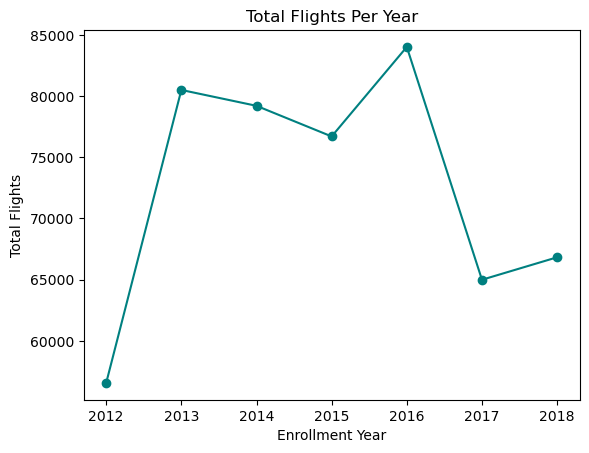

In [68]:
##Visual representation of year-over-year Total Flights
df2.groupby('Enrollment Year')['Total Flights'].sum().plot(kind='line', marker='o', color='teal', title='Total Flights Per Year')
plt.xlabel('Enrollment Year')
plt.ylabel('Total Flights')
plt.show()

## High Value Customers

In [76]:
##Top Customers
df2['Value Score']=df2['Dollar Cost Points Redeemed']*df2['Points Accumulated']
top_customers=df2.nlargest(10, 'Value Score')[['Loyalty Number', 'Country', 'Loyalty Card', 'Points Accumulated', 'Dollar Cost Points Redeemed', 'Value Score']]
top_customers

,Loyalty Number,Country,Loyalty Card,Points Accumulated,Dollar Cost Points Redeemed,Value Score
3112,366540,Canada,Aurora,89676.0,129,11568204.0
87754,214095,Canada,Star,84546.0,135,11413710.0
50231,480872,Canada,Nova,88344.0,122,10777968.0
221126,357059,Canada,Nova,67752.0,153,10366056.0
56656,532945,Canada,Nova,64500.0,136,8772000.0
174427,653304,Canada,Aurora,70020.0,125,8752500.0
32486,351461,Canada,Aurora,73584.0,115,8462160.0
389791,898427,Canada,Star,62790.0,132,8288280.0
346876,315014,Canada,Nova,52248.0,158,8255184.0
157618,772532,Canada,Aurora,55146.0,140,7720440.0


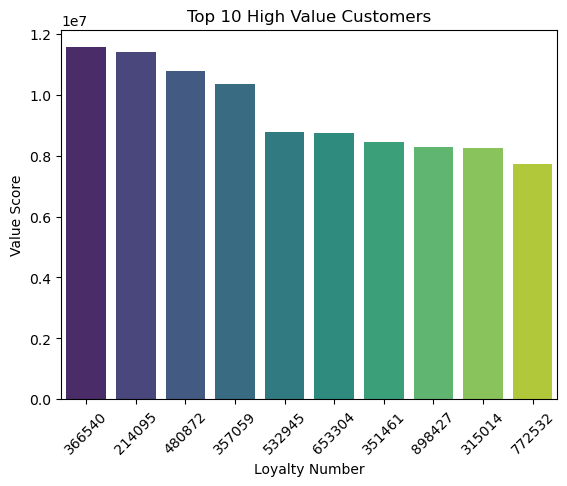

In [83]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
top_customers['Loyalty Number']=top_customers['Loyalty Number'].astype(str)
sns.barplot(x='Loyalty Number', y='Value Score', data=top_customers, palette='viridis')
plt.title('Top 10 High Value Customers')
plt.xticks(rotation=45)
plt.show()

## Other Insights

1. Most of the travelers are from Canada, Yukon province.
2. Overall flight cancellation rate is 9.54%.
3. Year 2016 witnessed the highest enrollments with 84017 total flights, while year 2012 witnessed the lowest enrollments with 56563 total flights.
4. Customer with loyalty number 366540 has the highest value score.